In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
from scipy.stats import f_oneway,pearsonr
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('cleaned_covid_worldwide.csv')
df.head()

,country,total_cases,total_deaths,total_recovered,active_cases,total_test,population
0,USA,1.000000,1.000000,1.000000,0.158971,1.000000,0.238019
1,India,0.428830,0.468465,0.435739,0.000160,0.789136,1.000000
2,France,0.379323,0.144962,0.387519,0.008722,0.234077,0.046625
3,Germany,0.362581,0.146267,0.369099,0.019723,0.105474,0.059634
4,Brazil,0.353413,0.615282,0.354504,0.019003,0.054987,0.153099


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          231 non-null    object 
 1   total_cases      231 non-null    float64
 2   total_deaths     231 non-null    float64
 3   total_recovered  231 non-null    float64
 4   active_cases     231 non-null    float64
 5   total_test       231 non-null    float64
 6   population       231 non-null    float64
dtypes: float64(6), object(1)
memory usage: 12.8+ KB


In [4]:
df.describe()

,total_cases,total_deaths,total_recovered,active_cases,total_test,population
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,0.028057,0.025842,0.026862,0.007625,0.025832,0.019993
std,0.090975,0.091892,0.089971,0.067060,0.097749,0.072274
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000230,0.000158,0.000119,0.000002,0.000195,0.000289
50%,0.001983,0.001734,0.001298,0.000067,0.001441,0.003918
75%,0.012439,0.012277,0.012388,0.000852,0.009902,0.015302
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.corr()

/tmp/ipykernel_60873/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,total_cases,total_deaths,total_recovered,active_cases,total_test,population
total_cases,1.000000,0.878769,0.990231,0.346931,0.841575,0.527981
total_deaths,0.878769,1.000000,0.883873,0.162793,0.794367,0.577434
total_recovered,0.990231,0.883873,1.000000,0.279439,0.844724,0.529768
active_cases,0.346931,0.162793,0.279439,1.000000,0.152164,0.104621
total_test,0.841575,0.794367,0.844724,0.152164,1.000000,0.664800
population,0.527981,0.577434,0.529768,0.104621,0.664800,1.000000


In [6]:
df['total_deaths'].value_counts()

0.000000    6
0.000034    3
0.000002    3
0.000735    2
0.000065    2
           ..
0.005488    1
0.008451    1
0.008902    1
0.017494    1
0.000007    1
Name: total_deaths, Length: 214, dtype: int64

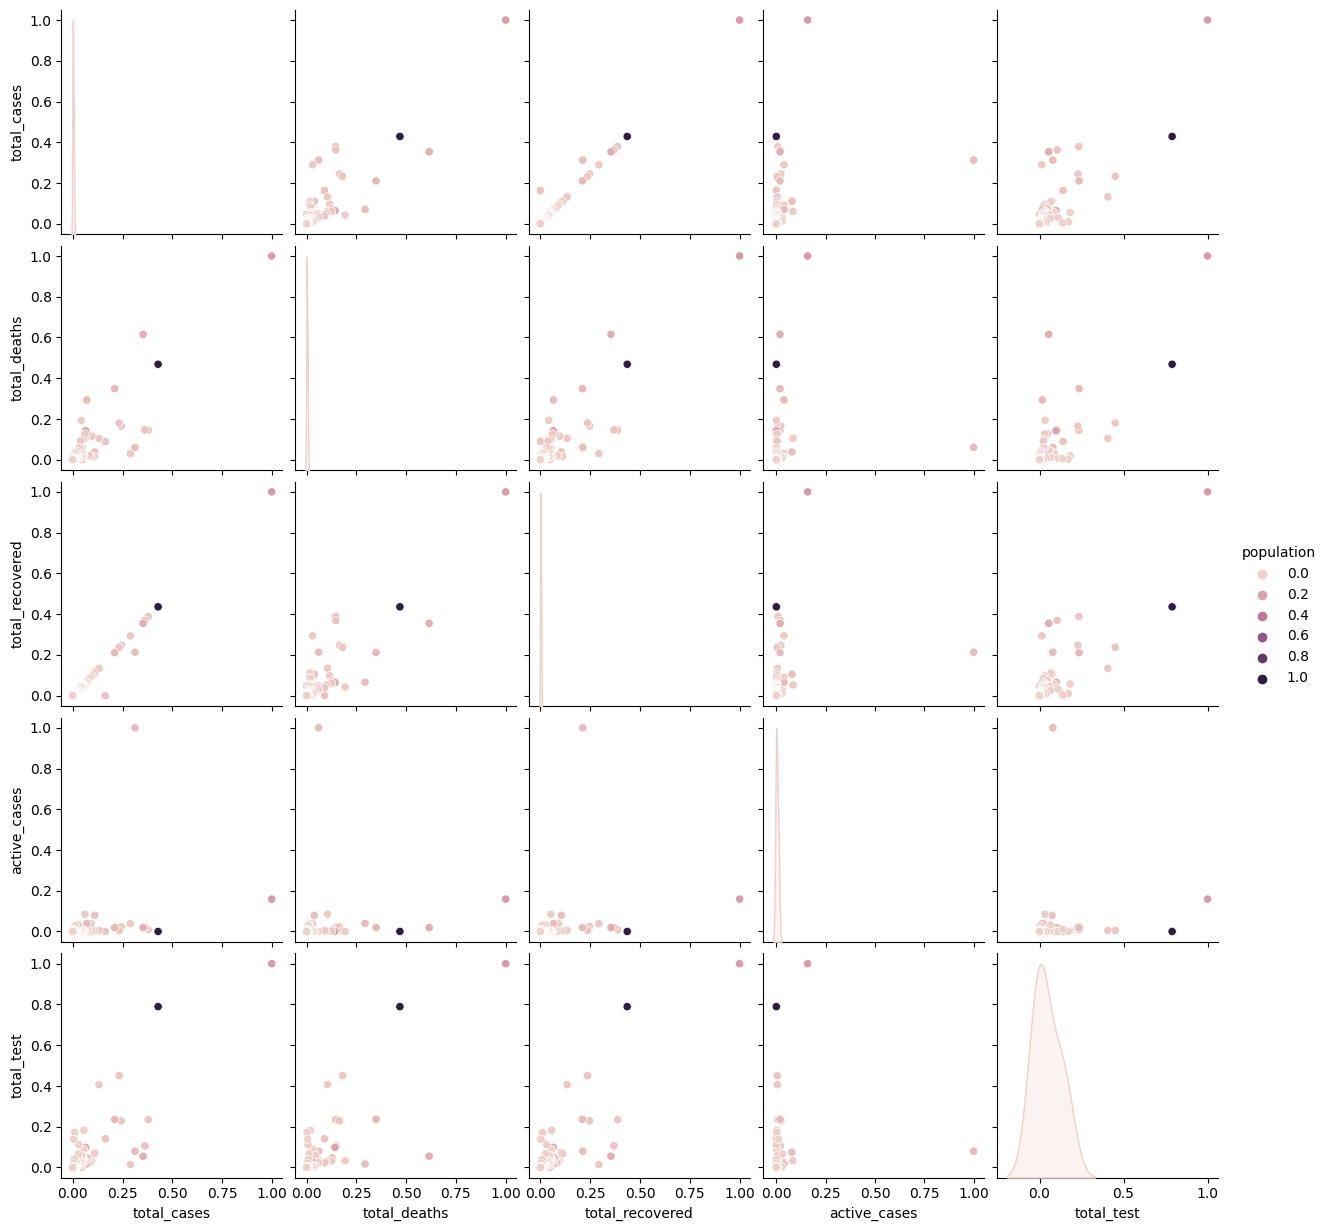

In [7]:
sns.pairplot(df, hue='population')

In [8]:
fig=px.choropleth(data_frame=df,locations=df['country'],locationmode='country names',color=df['total_deaths'],animation_frame=df['total_cases'],animation_group=df['total_cases'] ,template='plotly_dark')
fig.update_layout(dict1={'title':'Distribution of the number of deaths by country'})
fig.show()

In [9]:
fig=px.choropleth(data_frame=df,locations=df['country'],locationmode='country names',color=df['total_deaths'],animation_frame=df['total_cases'],animation_group=df['total_cases'] ,template='plotly_dark')
fig.update_layout(dict1={'title':'Distribution of the number of deaths by country'})
fig.show()